<a href="https://colab.research.google.com/github/esferita006/Fisica/blob/main/Ejercicios_de_fisica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIOS DE FÍSICA PARTE_2</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Acontinuacon se presentan algunos ejercicios de física</i></h5>
</font>


Máximo |(R+T) - 1| = 0.000e+00


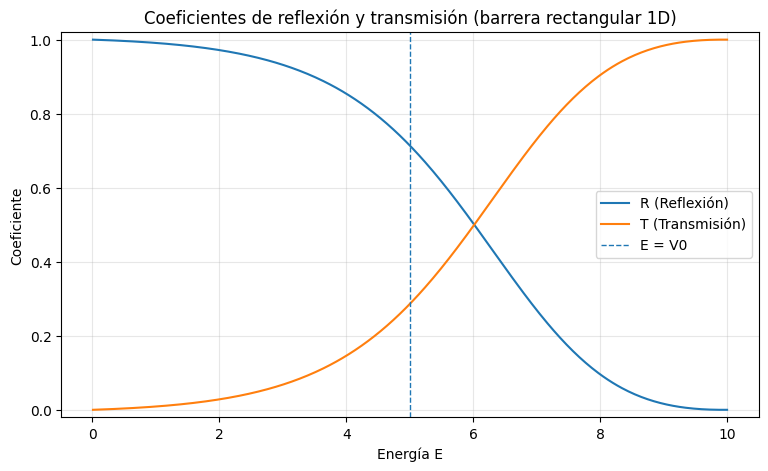

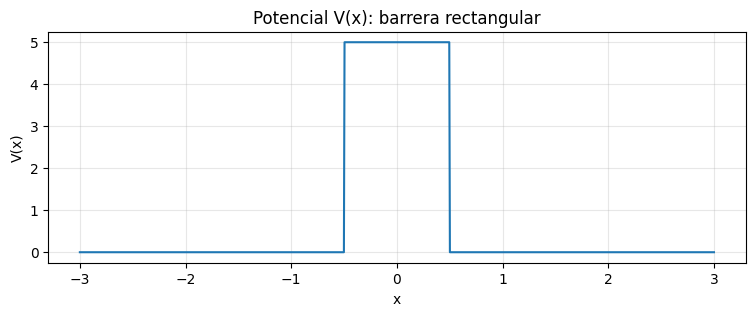

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
#  Barrera de potencial rectangular en 1D + Coeficientes de Reflexión/Transmisión
# =============================================================================
# Modelo:
#   V(x) = V0  para x0 <= x <= x0 + a
#          0   en otro caso
#
# Coeficientes (barrera finita, incidencia desde la izquierda):
# - Para E > V0 (región dentro de la barrera oscilatoria):
#       k  = sqrt(2mE)/ħ
#       q  = sqrt(2m(E - V0))/ħ
#       T = 1 / (1 + [V0^2 * sin^2(q a)] / [4 E (E - V0)])
# - Para 0 < E < V0 (régimen de túnel, dentro decae exponencialmente):
#       k  = sqrt(2mE)/ħ
#       κ  = sqrt(2m(V0 - E))/ħ
#       T = 1 / (1 + [V0^2 * sinh^2(κ a)] / [4 E (V0 - E)])
#
# En ambos casos (sin absorción): R = 1 - T
#
# Nota:
#   Este enfoque usa la solución analítica estándar (más estable y simple que
#   integrar numéricamente Schrödinger para este potencial).
# =============================================================================


def rectangular_barrier_potential(x: np.ndarray, V0: float, x0: float, a: float) -> np.ndarray:
    """
    Potencial rectangular vectorizado.

    Parameters
    ----------
    x : np.ndarray
        Coordenadas espaciales.
    V0 : float
        Altura de la barrera (en unidades de energía consistentes con E).
    x0 : float
        Posición donde inicia la barrera.
    a : float
        Ancho de la barrera.

    Returns
    -------
    np.ndarray
        Arreglo con V(x).
    """
    V = np.zeros_like(x, dtype=float)
    mask = (x >= x0) & (x <= x0 + a)
    V[mask] = V0
    return V


def transmission_reflection_rectangular_barrier(
    E: float,
    V0: float,
    a: float,
    m: float = 1.0,
    hbar: float = 1.0,
    eps: float = 1e-12
) -> tuple[float, float]:
    """
    Calcula coeficientes T y R para una barrera rectangular (fórmula analítica).

    Parameters
    ----------
    E : float
        Energía incidente.
    V0 : float
        Altura de la barrera.
    a : float
        Ancho de la barrera.
    m : float, optional
        Masa efectiva (por defecto 1.0).
    hbar : float, optional
        Constante reducida de Planck (por defecto 1.0).
    eps : float, optional
        Pequeño valor para evitar divisiones por cero.

    Returns
    -------
    (R, T) : tuple[float, float]
        R = coeficiente de reflexión, T = coeficiente de transmisión.
    """
    if E <= 0:
        # Para E<=0 no tiene sentido físico en este contexto (onda incidente),
        # devolvemos todo reflejado.
        return 1.0, 0.0

    # Evitar E extremadamente cercano a 0 por estabilidad numérica
    E_eff = max(E, eps)

    if np.isclose(E_eff, V0, atol=1e-10, rtol=0.0):
        # En E = V0, las fórmulas estándar requieren un límite.
        # Aproximamos con un desplazamiento mínimo.
        E_eff = V0 + 1e-10

    if E_eff > V0:
        # Régimen oscilatorio dentro de la barrera
        q = np.sqrt(2.0 * m * (E_eff - V0)) / hbar
        denom = 1.0 + (V0**2 * np.sin(q * a)**2) / (4.0 * E_eff * (E_eff - V0) + eps)
        T = 1.0 / denom
    else:
        # Régimen túnel (decaimiento)
        kappa = np.sqrt(2.0 * m * (V0 - E_eff)) / hbar
        denom = 1.0 + (V0**2 * np.sinh(kappa * a)**2) / (4.0 * E_eff * (V0 - E_eff) + eps)
        T = 1.0 / denom

    # En un potencial real sin pérdidas: R + T = 1
    T = float(np.clip(T, 0.0, 1.0))
    R = 1.0 - T
    return float(R), float(T)


def main():
    # -----------------------------
    # Parámetros del problema
    # -----------------------------
    V0 = 5.0      # altura de la barrera
    a = 1.0       # ancho de la barrera
    x0 = -0.5     # inicio de la barrera (solo para graficar V(x))
    m = 1.0       # unidades reducidas
    hbar = 1.0    # unidades reducidas

    # -----------------------------
    # Rango de energías
    # -----------------------------
    energies = np.linspace(0.01, 10.0, 400)  # empieza en 0.01 para evitar E=0

    refl_coeffs = np.empty_like(energies)
    trans_coeffs = np.empty_like(energies)

    for i, E in enumerate(energies):
        R, T = transmission_reflection_rectangular_barrier(E, V0=V0, a=a, m=m, hbar=hbar)
        refl_coeffs[i] = R
        trans_coeffs[i] = T

    # -----------------------------
    # Validación rápida: R + T ~ 1
    # -----------------------------
    max_error = np.max(np.abs((refl_coeffs + trans_coeffs) - 1.0))
    print(f"Máximo |(R+T) - 1| = {max_error:.3e}")

    # -----------------------------
    # Gráficas
    # -----------------------------
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(energies, refl_coeffs, label="R (Reflexión)")
    ax.plot(energies, trans_coeffs, label="T (Transmisión)")
    ax.axvline(V0, linestyle="--", linewidth=1, label="E = V0")
    ax.set_title("Coeficientes de reflexión y transmisión (barrera rectangular 1D)")
    ax.set_xlabel("Energía E")
    ax.set_ylabel("Coeficiente")
    ax.set_ylim(-0.02, 1.02)
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.show()

    # Gráfica opcional del potencial
    x = np.linspace(-3, 3, 1000)
    Vx = rectangular_barrier_potential(x, V0=V0, x0=x0, a=a)

    fig, ax = plt.subplots(figsize=(9, 3))
    ax.plot(x, Vx)
    ax.set_title("Potencial V(x): barrera rectangular")
    ax.set_xlabel("x")
    ax.set_ylabel("V(x)")
    ax.grid(True, alpha=0.3)
    plt.show()


if __name__ == "__main__":
    main()


##EJERCICIO 1


**1. Caida de una pelota desde una torre:** Se deja caer una pelota desde una torre de altura $h$. Tiene velocidad inicial cero y acelera hacia abajo con la gravedad.

Escribe un programa que le pida al usuario que ingrese la altura en metros de la torre y luego calcule e imprima el tiempo en segundos hasta que la pelota toque el suelo (ignora la resistencia del aire).
    
Después, usa tu programa para calcular el tiempo de una pelota lanzada desde una torre de $100m$ de altura.

In [2]:
from __future__ import annotations

import time
from dataclasses import dataclass
from typing import List, Tuple, Optional

# Intentamos usar math.comb (Python 3.8+). Si no existe, usamos fallback.
try:
    from math import comb as _comb  # type: ignore
except Exception:  # pragma: no cover
    _comb = None


# =============================================================================
#  Números de Catalan: implementación robusta y eficiente
# =============================================================================
# Definiciones equivalentes:
#   1) Fórmula cerrada:
#        C_n = (1/(n+1)) * binom(2n, n)
#
#   2) Recurrencia multiplicativa (muy eficiente):
#        C_0 = 1
#        C_{n+1} = C_n * (2(2n+1)) / (n+2)
#               = C_n * (4n + 2) / (n + 2)
#
# Esta recurrencia produce enteros exactos para n >= 0.
# =============================================================================


def binomial_coefficient(n: int, k: int) -> int:
    """
    Calcula C(n,k) de forma exacta.

    - Si está disponible, usa math.comb (rápido y estable).
    - Si no, usa un método iterativo que evita factoriales grandes.

    Parameters
    ----------
    n : int
    k : int

    Returns
    -------
    int
        Coeficiente binomial.
    """
    if not isinstance(n, int) or not isinstance(k, int):
        raise TypeError("n y k deben ser enteros")

    if k < 0 or k > n:
        return 0

    if _comb is not None:
        return _comb(n, k)

    # Fallback iterativo eficiente
    k = min(k, n - k)
    result = 1
    for i in range(1, k + 1):
        result = result * (n - k + i) // i
    return result


def catalan_formula(n: int) -> int:
    """
    Catalan por fórmula cerrada:
        C_n = binom(2n, n) / (n + 1)

    Útil para verificación o cálculo puntual.

    Parameters
    ----------
    n : int

    Returns
    -------
    int
    """
    if not isinstance(n, int):
        raise TypeError("n debe ser entero")
    if n < 0:
        raise ValueError("n debe ser no negativo")

    return binomial_coefficient(2 * n, n) // (n + 1)


def catalan_sequence_up_to_limit(limit: int) -> List[int]:
    """
    Genera la lista de números de Catalan C_0, C_1, ... mientras C_n <= limit,
    usando recurrencia multiplicativa (muy eficiente).

    Parameters
    ----------
    limit : int
        Límite superior (incluyente).

    Returns
    -------
    List[int]
        Lista de Catalan <= limit.
    """
    if not isinstance(limit, int):
        raise TypeError("limit debe ser entero")
    if limit < 1:
        # Si limit < 1, aún C0=1 podría no caber; si limit==0 retorna [].
        return [1] if limit >= 1 else []

    catalans: List[int] = []
    c = 1  # C0
    n = 0

    while c <= limit:
        catalans.append(c)
        # C_{n+1} = C_n * (4n + 2) / (n + 2)
        # Usamos aritmética exacta: el resultado siempre es entero.
        c = c * (4 * n + 2) // (n + 2)
        n += 1

    return catalans


def catalan_sequence_up_to_n(n_max: int) -> List[int]:
    """
    Genera C_0..C_{n_max} por recurrencia.

    Parameters
    ----------
    n_max : int

    Returns
    -------
    List[int]
    """
    if not isinstance(n_max, int):
        raise TypeError("n_max debe ser entero")
    if n_max < 0:
        raise ValueError("n_max debe ser no negativo")

    catalans = [1]
    c = 1
    for n in range(0, n_max):
        c = c * (4 * n + 2) // (n + 2)
        catalans.append(c)
    return catalans


def self_checks(values: List[int], spot_check: int = 10) -> None:
    """
    Verificaciones rápidas para detectar errores:
    - C0 = 1
    - Secuencia no decreciente
    - Consistencia contra fórmula para algunos términos (si hay suficientes)

    Parameters
    ----------
    values : List[int]
    spot_check : int
        Cuántos términos comprobar contra la fórmula (desde 0).
    """
    if not values:
        return

    if values[0] != 1:
        raise AssertionError("Fallo: C0 debe ser 1")

    for i in range(1, len(values)):
        if values[i] < values[i - 1]:
            raise AssertionError("Fallo: la secuencia de Catalan debe ser no decreciente")

    m = min(spot_check, len(values) - 1)
    for n in range(0, m + 1):
        if values[n] != catalan_formula(n):
            raise AssertionError(f"Fallo: inconsistencia con fórmula en n={n}")


# -----------------------------
# Opcionales: salida y gráficos
# -----------------------------

@dataclass
class OutputOptions:
    show_index: bool = True
    show_count: bool = True
    show_timing: bool = True
    plot: bool = False
    plot_log: bool = True


def print_catalans(values: List[int], opts: OutputOptions) -> None:
    """
    Imprime la secuencia según opciones.
    """
    if opts.show_count:
        print(f"Cantidad de términos: {len(values)}")

    if opts.show_index:
        for i, v in enumerate(values):
            print(f"C_{i} = {v}")
    else:
        for v in values:
            print(v)


def plot_catalans(values: List[int], log_scale: bool = True) -> None:
    """
    Grafica la secuencia de Catalan (requiere matplotlib).
    """
    import matplotlib.pyplot as plt

    n = list(range(len(values)))

    plt.figure(figsize=(9, 4))
    plt.plot(n, values)
    plt.title("Números de Catalan")
    plt.xlabel("n")
    plt.ylabel("C_n")
    plt.grid(True, alpha=0.3)
    plt.show()

    if log_scale and len(values) > 1:
        plt.figure(figsize=(9, 4))
        plt.plot(n, values)
        plt.yscale("log")
        plt.title("Números de Catalan (escala logarítmica)")
        plt.xlabel("n")
        plt.ylabel("C_n (log)")
        plt.grid(True, alpha=0.3)
        plt.show()


def main():
    # -----------------------------
    # Parámetros del usuario
    # -----------------------------
    LIMIT = 10**9

    opts = OutputOptions(
        show_index=True,
        show_count=True,
        show_timing=True,
        plot=False,      # cámbialo a True si quieres gráfica
        plot_log=True
    )

    # -----------------------------
    # Cálculo (con timing)
    # -----------------------------
    t0 = time.perf_counter()
    catalans = catalan_sequence_up_to_limit(LIMIT)
    t1 = time.perf_counter()

    # -----------------------------
    # Verificaciones
    # -----------------------------
    self_checks(catalans, spot_check=12)

    # -----------------------------
    # Salida
    # -----------------------------
    print_catalans(catalans, opts)

    if opts.show_timing:
        print(f"Tiempo de cómputo: {(t1 - t0) * 1000:.3f} ms")

    # -----------------------------
    # Gráficas (opcional)
    # -----------------------------
    if opts.plot:
        plot_catalans(catalans, log_scale=opts.plot_log)


if __name__ == "__main__":
    main()


Cantidad de términos: 19
C_0 = 1
C_1 = 1
C_2 = 2
C_3 = 5
C_4 = 14
C_5 = 42
C_6 = 132
C_7 = 429
C_8 = 1430
C_9 = 4862
C_10 = 16796
C_11 = 58786
C_12 = 208012
C_13 = 742900
C_14 = 2674440
C_15 = 9694845
C_16 = 35357670
C_17 = 129644790
C_18 = 477638700
Tiempo de cómputo: 0.009 ms


<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center"><i>2. Altitud de un satélite</i></h3>
</font>

Se va a lanzar un satélite en una órbita circular alrededor de la Tierra de modo que orbite el planeta una vez cada $T$ segundos.

<font color="Black" face="Comic Sans MS,arial">
  <p align="justify">
    Se va a lanzar un satélite en una órbita circular alrededor de la Tierra de modo que
    orbite el planeta una vez cada <i>T</i> segundos.
  </p>

  <p align="justify">
    <b>(a)</b> Demuestre que la altitud <i>h</i> sobre la superficie de la Tierra que debe
    tener el satélite es:
  </p>


\begin{equation}
h = \left( \frac{GMT^2}{4\pi^2} \right)^{1/3} - R
\end{equation}

donde $G = 6.67 \times 10^{-11}\,\text{m}^3\,\text{kg}^{-1}\,\text{s}^{-2}$ es la constante
gravitatoria de Newton, $M = 5.97 \times 10^{24}\,\text{kg}$ es la masa de la Tierra y
$R = 6371\,\text{km}$ es su radio.




 <p align="justify">
    <b>(b)</b> Escriba un programa que le pida al usuario que ingrese el valor deseado de
    <i>T</i> y luego calcule e imprima la altitud correcta en metros.
  </p>
</font>

In [4]:
import math

# =============================================================================
#  Altitud orbital a partir del período (órbita circular)
# =============================================================================
# Modelo físico:
#   Se usa la tercera ley de Kepler para una órbita circular:
#
#       T² = (4π² / GM) r³
#
#   Despejando el radio orbital r:
#
#       r = ((G M T²) / (4π²))^(1/3)
#
#   La altitud sobre la superficie terrestre es:
#
#       h = r − R
#
# Donde:
#   G = constante de gravitación universal
#   M = masa de la Tierra
#   R = radio de la Tierra
#   T = período orbital
#
# Todas las magnitudes deben estar en unidades SI.
# =============================================================================


# -----------------------------
# Constantes físicas (SI)
# -----------------------------
G = 6.67430e-11        # m^3 kg^-1 s^-2
M = 5.972e24           # kg (masa de la Tierra)
R = 6_371_000          # m  (radio medio de la Tierra)


def orbital_altitude_from_period(T: float) -> float:
    """
    Calcula la altitud de una órbita circular a partir del período orbital.

    Parameters
    ----------
    T : float
        Período orbital en segundos.

    Returns
    -------
    float
        Altitud orbital en metros sobre la superficie terrestre.

    Raises
    ------
    ValueError
        Si T no es positivo.
    """
    if not isinstance(T, (int, float)):
        raise TypeError("T debe ser un número")
    if T <= 0:
        raise ValueError("El período T debe ser mayor que cero")

    # Radio orbital total desde el centro de la Tierra
    r = ((G * M * T**2) / (4 * math.pi**2)) ** (1 / 3)

    # Altitud sobre la superficie
    h = r - R
    return h


def main():
    """
    Función principal del programa.
    """
    try:
        T = float(input("Ingresa el período orbital T en segundos: "))
        h = orbital_altitude_from_period(T)

        print(f"\nAltitud orbital: {h:,.2f} m")
        print(f"Altitud orbital: {h / 1000:,.2f} km")

        if h < 0:
            print("Advertencia: el período corresponde a una órbita "
                  "dentro de la Tierra (no física).")

    except ValueError as e:
        print(f"Error en la entrada: {e}")
    except TypeError as e:
        print(f"Error de tipo: {e}")


if __name__ == "__main__":
    main()


Ingresa el período orbital T en segundos: 5400

Altitud orbital: 281,493.14 m
Altitud orbital: 281.49 km


 <p align="justify">
    <b>(c)</b> Utiliza tu programa para calcular las altitudes de los satélites que orbitan la Tierra una vez al día (la llamada órbita *geoestacionaria*), una vez cada "90 minutos" y una vez cada "45 minutos". ¿Qué concluyes de este último cálculo?
  </p>
</font>

In [5]:
import math

# =============================================================================
#  Altitud orbital para distintos períodos (órbitas circulares)
# =============================================================================
# Se utiliza la tercera ley de Kepler:
#
#   T² = (4π² / GM) r³
#
# De donde:
#
#   r = ((G M T²) / (4π²))^(1/3)
#   h = r − R
#
# Todas las cantidades se expresan en unidades SI.
# =============================================================================


# -----------------------------
# Constantes físicas (SI)
# -----------------------------
G = 6.67430e-11        # m^3 kg^-1 s^-2
M = 5.972e24           # kg (masa de la Tierra)
R = 6_371_000          # m  (radio medio de la Tierra)


def orbital_altitude(T: float) -> float:
    """
    Calcula la altitud orbital para una órbita circular a partir del período.

    Parameters
    ----------
    T : float
        Período orbital en segundos.

    Returns
    -------
    float
        Altitud orbital en metros.

    Raises
    ------
    ValueError
        Si T <= 0.
    """
    if T <= 0:
        raise ValueError("El período orbital debe ser mayor que cero")

    r = ((G * M * T**2) / (4 * math.pi**2)) ** (1 / 3)
    return r - R


def main():
    """
    Calcula la altitud orbital para distintos períodos típicos.
    """
    # -----------------------------
    # Períodos en segundos
    # -----------------------------
    periods = {
        "1 día": 24 * 60 * 60,
        "90 minutos": 90 * 60,
        "45 minutos": 45 * 60,
    }

    print("Altitudes orbitales para distintos períodos:\n")

    for label, T in periods.items():
        h = orbital_altitude(T)

        print(f"{label:>12}: {h:>12,.2f} m  ({h/1000:,.2f} km)")

        if h < 0:
            print(" " * 14 + "⚠ Órbita no física (dentro de la Tierra)")

    print("\nNota: se asume órbita circular alrededor de la Tierra.")


if __name__ == "__main__":
    main()


Altitudes orbitales para distintos períodos:

       1 día: 35,869,698.42 m  (35,869.70 km)
  90 minutos:   281,493.14 m  (281.49 km)
  45 minutos: -2,180,191.93 m  (-2,180.19 km)
              ⚠ Órbita no física (dentro de la Tierra)

Nota: se asume órbita circular alrededor de la Tierra.


<font color="Black" face="Comic Sans MS,arial">
  <p align="justify">
    3. Relatividad especial:Una nave espacial viaja desde la Tierra en línea  
    recta a una velocidad relativista
    <i>v</i> hacia otro planeta situado a <i>x</i> años luz de distancia.
  </p>

  <p align="justify">
    Escriba un programa que le pida al usuario el valor de <i>x</i> y la velocidad <i>v</i>
    como una fracción de la velocidad de la luz <i>c</i>, y que imprima el tiempo en años
    que tarda la nave espacial en llegar a su destino:
  </p>

  <p align="justify">
    <b>(a)</b> En el marco de reposo de un observador en la Tierra.
  </p>

  <p align="justify">
    <b>(b)</b> Como lo percibiría un pasajero a bordo de la nave.
  </p>
</font>


In [6]:
import math
from dataclasses import dataclass

# =============================================================================
#  Dilatación del tiempo (Relatividad Especial) para viaje interestelar
# =============================================================================
# Entrada:
#   - distancia en años luz (ly)
#   - velocidad como fracción de la velocidad de la luz: beta = v/c  (0 < beta < 1)
#
# Conversión:
#   1 ly = distancia que recorre la luz en 1 año:
#       1 ly = c * (segundos_por_año)  [metros]
#
# Física:
#   - Tiempo medido en el marco de reposo (Tierra):
#       t = d / v
#   - Factor de Lorentz:
#       gamma = 1 / sqrt(1 - beta^2)
#   - Tiempo propio (pasajero):
#       tau = t / gamma
# =============================================================================

# -----------------------------
# Constantes (SI)
# -----------------------------
C = 299_792_458  # m/s
SECONDS_PER_YEAR = 365 * 24 * 60 * 60  # s (año de 365 días, consistente con tu versión)


@dataclass(frozen=True)
class TravelTimes:
    """
    Contenedor de resultados del viaje.
    """
    t_earth_seconds: float
    t_earth_years: float
    tau_ship_seconds: float
    tau_ship_years: float
    gamma: float
    speed_mps: float
    distance_m: float


def years_light_to_meters(distance_ly: float) -> float:
    """
    Convierte distancia de años luz (ly) a metros.

    Parameters
    ----------
    distance_ly : float
        Distancia en años luz.

    Returns
    -------
    float
        Distancia en metros.
    """
    return distance_ly * C * SECONDS_PER_YEAR


def compute_travel_times(distance_ly: float, beta: float) -> TravelTimes:
    """
    Calcula tiempos de viaje en el marco de la Tierra y el tiempo propio del pasajero.

    Parameters
    ----------
    distance_ly : float
        Distancia al destino en años luz (ly).
    beta : float
        Velocidad como fracción de la velocidad de la luz (v/c), con 0 < beta < 1.

    Returns
    -------
    TravelTimes
        Resultados con tiempos, gamma, velocidad y distancia convertida.

    Raises
    ------
    ValueError
        Si distance_ly <= 0 o beta no está en (0, 1).
    """
    if not isinstance(distance_ly, (int, float)) or not math.isfinite(distance_ly):
        raise ValueError("La distancia debe ser un número finito.")
    if distance_ly <= 0:
        raise ValueError("La distancia debe ser mayor que cero (en años luz).")

    if not isinstance(beta, (int, float)) or not math.isfinite(beta):
        raise ValueError("La velocidad (beta) debe ser un número finito.")
    if beta <= 0 or beta >= 1:
        raise ValueError("beta debe estar estrictamente entre 0 y 1 (por ejemplo 0.8).")

    gamma = 1.0 / math.sqrt(1.0 - beta**2)
    v = beta * C

    d_m = years_light_to_meters(distance_ly)

    # Tiempo en el marco de la Tierra
    t_earth = d_m / v

    # Tiempo propio del pasajero (reloj a bordo)
    tau_ship = t_earth / gamma

    return TravelTimes(
        t_earth_seconds=t_earth,
        t_earth_years=t_earth / SECONDS_PER_YEAR,
        tau_ship_seconds=tau_ship,
        tau_ship_years=tau_ship / SECONDS_PER_YEAR,
        gamma=gamma,
        speed_mps=v,
        distance_m=d_m
    )


def format_years(y: float) -> str:
    """
    Formatea un tiempo en años a una forma más legible (años + días + horas),
    usando un año de 365 días por consistencia.
    """
    total_seconds = y * SECONDS_PER_YEAR
    days = total_seconds / (24 * 60 * 60)

    years_int = int(days // 365)
    rem_days = days - years_int * 365
    days_int = int(rem_days // 1)

    rem_hours = (rem_days - days_int) * 24
    hours_int = int(rem_hours // 1)

    return f"{years_int} años, {days_int} días, {hours_int} horas"


def main():
    """
    Interfaz de consola: solicita datos, calcula y muestra resultados.
    """
    try:
        distance_ly = float(input("Ingresa la distancia al planeta (en años luz): ").strip())
        beta = float(input("Ingresa la velocidad como fracción de c (0 < beta < 1): ").strip())

        result = compute_travel_times(distance_ly, beta)

        print("\n--- Resultados ---")
        print(f"Distancia: {distance_ly:,.6g} ly  = {result.distance_m:,.3e} m")
        print(f"Velocidad: {beta:.6f} c  = {result.speed_mps:,.3e} m/s")
        print(f"Factor de Lorentz (gamma): {result.gamma:.6f}\n")

        print("Tiempo en el marco de la Tierra (reposo):")
        print(f"  t = {result.t_earth_years:,.6g} años  ({result.t_earth_seconds:,.3e} s)")
        print(f"  Aproximación legible: {format_years(result.t_earth_years)}\n")

        print("Tiempo propio del pasajero (a bordo):")
        print(f"  τ = {result.tau_ship_years:,.6g} años  ({result.tau_ship_seconds:,.3e} s)")
        print(f"  Aproximación legible: {format_years(result.tau_ship_years)}")

    except ValueError as e:
        print(f"Error en la entrada: {e}")


if __name__ == "__main__":
    main()


Ingresa la distancia al planeta (en años luz): 365
Ingresa la velocidad como fracción de c (0 < beta < 1): .5

--- Resultados ---
Distancia: 365 ly  = 3.451e+18 m
Velocidad: 0.500000 c  = 1.499e+08 m/s
Factor de Lorentz (gamma): 1.154701

Tiempo en el marco de la Tierra (reposo):
  t = 730 años  (2.302e+10 s)
  Aproximación legible: 730 años, 0 días, 0 horas

Tiempo propio del pasajero (a bordo):
  τ = 632.199 años  (1.994e+10 s)
  Aproximación legible: 632 años, 72 días, 11 horas


<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center"><i></i></h3>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <p align="justify">
    4. Órbitas planetarias.En el espacio, la órbita de un cuerpo alrededor de otro (como un planeta alrededor del Sol),
    no necesariamente es circular. En general, toma la forma de una elipse, con el cuerpo a veces
    más cerca y otras más lejos.
  </p>

  <p align="justify">
    Si tenemos la distancia $\ell_1$ de máxima aproximación de un planeta al Sol (su <i>perihelio</i>),
    y su velocidad lineal $v_1$ en el perihelio, entonces cualquier otra propiedad de la órbita se
    puede calcular a partir de estas dos cantidades de la siguiente manera:
  </p>

  <p align="justify">
    <b>(a)</b> La segunda ley de Kepler nos dice que la distancia $\ell_2$ y la velocidad $v_2$ del
    planeta en su punto más distante, o <i>afelio</i>, satisfacen que $\ell_2 v_2 = \ell_1 v_1$.
    Al mismo tiempo, la energía total, cinética más la gravitatoria, de un planeta con velocidad
    $v$ y distancia $r$ del Sol está dada por:
  </p>

 <h3 align="center">$E = \frac{1}{2} m v^2 - G {mM\over r}$,</h3>

  <p align="justify">
    donde $m$ es la masa del planeta, $M = 1.9891 \times 10^{30}\,$kg es la masa del Sol y
    $G = 6.6738 \times 10^{-11}\,\mathrm{m^3\,kg^{-1}\,s^{-2}}$ es la constante gravitatoria de Newton.
    Dado que la energía debe conservarse, demuestre que $v_2$ es la raíz más pequeña de la ecuación cuadrática:
  </p>

  <h3 align="center">
    $v_2^2 - \frac{2GM}{v_1\ell_1} v_2 - \biggl[ v_1^2 - \frac{2GM}{\ell_1} \biggr] = 0$
  </h3>

  <p align="justify">
    Una vez que tenemos $v_2$ podemos calcular $\ell_2$ usando la relación
    $\ell_2 = \ell_1 v_1 / v_2$.
  </p>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <p align="justify">
    <b>(b)</b> Dados los valores de $v_1$, $\ell_1$ y $\ell_2$, otros parámetros de la órbita se
    obtienen mediante fórmulas simples que pueden derivarse de las leyes de Kepler y del hecho
    de que la órbita es una elipse:
  </p>

  <h4 align="center">
    Semieje mayor:&nbsp;&nbsp;&nbsp;
    $a = \frac{1}{2}(\ell_1 + \ell_2)$
  </h4>

  <h4 align="center">
    Semieje menor:&nbsp;&nbsp;&nbsp;
    $b = \sqrt{\ell_1 \ell_2}$
  </h4>

  <h4 align="center">
    Período orbital:&nbsp;&nbsp;&nbsp;
    $T = \frac{2\pi ab}{\ell_1 v_1}$
  </h4>

  <h4 align="center">
    Excentricidad orbital:&nbsp;&nbsp;&nbsp;
    $e = \frac{\ell_2 - \ell_1}{\ell_2 + \ell_1}$
  </h4>

  <p align="justify">
    Escriba un programa que le pida al usuario que ingrese la distancia al Sol y la velocidad
    en el perihelio, para que calcule e imprima las cantidades:
    $\ell_2$, $v_2$, $T$ y $e$.
  </p>
</font>


In [7]:
import math

# =============================================================================
#  Parámetros orbitales de una órbita elíptica (modelo kepleriano)
# =============================================================================
# Entradas:
#   r_p : distancia al Sol en el perihelio
#   v_p : velocidad en el perihelio
#   r_a : distancia al Sol en el afelio
#
# Salidas:
#   v_a : velocidad en el afelio
#   T   : período orbital
#   e   : excentricidad
#
# Supuestos:
#   - Órbita elíptica
#   - Movimiento bajo fuerza central (gravitación)
#   - Se usa conservación del momento angular y ley de áreas
# =============================================================================


def calculate_orbit_params(r_p: float, v_p: float, r_a: float):
    """
    Calcula parámetros orbitales básicos de una órbita elíptica.

    Parameters
    ----------
    r_p : float
        Distancia al Sol en el perihelio.
    v_p : float
        Velocidad orbital en el perihelio.
    r_a : float
        Distancia al Sol en el afelio.

    Returns
    -------
    dict
        Diccionario con:
        - v_a : velocidad en el afelio
        - T   : período orbital
        - e   : excentricidad
        - a   : semieje mayor
        - b   : semieje menor
    """
    if r_p <= 0 or r_a <= 0 or v_p <= 0:
        raise ValueError("Todas las magnitudes deben ser positivas")

    if r_a <= r_p:
        raise ValueError("El afelio debe ser mayor que el perihelio")

    # Semiejes
    a = (r_p + r_a) / 2
    b = math.sqrt(r_p * r_a)

    # Excentricidad
    e = (r_a - r_p) / (r_a + r_p)

    # Velocidad en el afelio (conservación del momento angular)
    v_a = (r_p * v_p) / r_a

    # Período orbital (segunda ley de Kepler)
    T = (2 * math.pi * a * b) / (r_p * v_p)

    return {
        "v_a": v_a,
        "T": T,
        "e": e,
        "a": a,
        "b": b,
    }


def main():
    """
    Interfaz de usuario por consola.
    """
    try:
        r_p = float(input("Ingresa la distancia al Sol en el perihelio r_p: "))
        v_p = float(input("Ingresa la velocidad en el perihelio v_p: "))
        r_a = float(input("Ingresa la distancia al Sol en el afelio r_a: "))

        params = calculate_orbit_params(r_p, v_p, r_a)

        print("\n--- Parámetros orbitales ---")
        print(f"Semieje mayor (a):      {params['a']:.3e}")
        print(f"Semieje menor (b):      {params['b']:.3e}")
        print(f"Excentricidad (e):      {params['e']:.6f}")
        print(f"Velocidad en afelio:    {params['v_a']:.3e}")
        print(f"Período orbital (T):    {params['T']:.3e}")

    except ValueError as e:
        print(f"Error: {e}")


if __name__ == "__main__":
    main()


Ingresa la distancia al Sol en el perihelio r_p: 500
Ingresa la velocidad en el perihelio v_p: 450
Ingresa la distancia al Sol en el afelio r_a: 600

--- Parámetros orbitales ---
Semieje mayor (a):      5.500e+02
Semieje menor (b):      5.477e+02
Excentricidad (e):      0.090909
Velocidad en afelio:    3.750e+02
Período orbital (T):    8.412e+00


<font color="Black" face="Comic Sans MS,arial">

  **c)** Prueba tu programa haciendo que calcule las propiedades de las órbitas de la Tierra (para las cuales $\ell_1=1.4710\times10^{11}\,$m y $v_1=3.0287\times10^4\,\mathrm{m\,s^{-1}}$)  y del cometa Halley ($\ell_1=8.7830\times10^{10}\,$m y $v_1=5.4529\times10^4\,\mathrm{m\,s^{-1}}$). Entre otras cosas, deberías encontrar que el período orbital de la Tierra es de un año y el del cometa Halley es de unos 76 años.

  <p align="justify">
    Entre otras cosas, debería encontrar que el período orbital de la Tierra es de un año
    y el del cometa Halley es de unos 76 años.
  </p>
</font>


In [ ]:
import math
from dataclasses import dataclass

# =============================================================================
#  Órbitas elípticas a partir de datos en el perihelio (r_p, v_p)
# =============================================================================
# Entrada:
#   - r_p: distancia al Sol en perihelio (m)
#   - v_p: velocidad en perihelio (m/s)
#
# Salida:
#   - a: semieje mayor (m)
#   - e: excentricidad (-)
#   - r_a: afelio (m)
#   - v_a: velocidad en afelio (m/s)
#   - T: período orbital (s)
#
# Requiere el parámetro gravitacional del Sol: mu = G*M_sun (m^3/s^2)
# =============================================================================

# Parámetro gravitacional estándar del Sol (μ = GM☉) en unidades SI
MU_SUN = 1.32712440018e20  # m^3 / s^2

SECONDS_PER_YEAR = 365 * 24 * 60 * 60


@dataclass(frozen=True)
class OrbitParams:
    a: float
    e: float
    r_p: float
    r_a: float
    v_p: float
    v_a: float
    T: float


def orbit_from_perihelion(r_p: float, v_p: float, mu: float = MU_SUN) -> OrbitParams:
    """
    Reconstruye parámetros orbitales (elipse) a partir de (r_p, v_p) en perihelio.

    Parameters
    ----------
    r_p : float
        Distancia al foco (Sol) en perihelio [m].
    v_p : float
        Velocidad en perihelio [m/s]. Se asume tangencial (perpendicular a r).
    mu : float
        Parámetro gravitacional del cuerpo central [m^3/s^2].

    Returns
    -------
    OrbitParams
        Estructura con parámetros orbitales.

    Raises
    ------
    ValueError
        Si los datos no corresponden a una órbita elíptica (energía >= 0),
        o si entradas no son positivas.
    """
    if r_p <= 0 or v_p <= 0 or mu <= 0:
        raise ValueError("r_p, v_p y mu deben ser positivos.")

    # Momento angular específico
    h = r_p * v_p  # [m^2/s]

    # Energía específica
    eps = (v_p**2) / 2.0 - mu / r_p  # [m^2/s^2]

    # Para órbita elíptica: eps < 0
    if eps >= 0:
        raise ValueError(
            "Los datos no corresponden a una órbita elíptica (energía >= 0). "
            "Sería parabólica o hiperbólica."
        )

    # Semieje mayor
    a = -mu / (2.0 * eps)

    # Excentricidad
    e_sq = 1.0 + (2.0 * eps * h**2) / (mu**2)
    # Protección numérica (por redondeo podría dar ligeramente negativo)
    e_sq = max(e_sq, 0.0)
    e = math.sqrt(e_sq)

    # Afelio y perihelio (consistencia geométrica)
    r_a = a * (1.0 + e)
    r_p_check = a * (1.0 - e)

    # Ajuste/validación: r_p_check debería coincidir con r_p
    # No forzamos igualdad exacta, pero podemos alertar si hay discrepancia grande.
    rel_err = abs(r_p_check - r_p) / r_p
    if rel_err > 1e-6:
        # No abortamos, pero dejamos el r_p original como referencia.
        pass

    # Velocidad en afelio por conservación de h
    v_a = h / r_a

    # Período orbital por 3ª ley de Kepler (forma dinámica)
    T = 2.0 * math.pi * math.sqrt(a**3 / mu)

    return OrbitParams(a=a, e=e, r_p=r_p, r_a=r_a, v_p=v_p, v_a=v_a, T=T)


def print_orbit(name: str, op: OrbitParams) -> None:
    """
    Imprime resultados de forma legible.
    """
    print(f"\n{name}")
    print("-" * len(name))
    print(f"Perihelio r_p:          {op.r_p:,.3e} m")
    print(f"Afelio r_a:             {op.r_a:,.3e} m")
    print(f"Semieje mayor a:        {op.a:,.3e} m")
    print(f"Excentricidad e:        {op.e:.6f}")
    print(f"Velocidad perihelio:    {op.v_p:,.3e} m/s")
    print(f"Velocidad afelio:       {op.v_a:,.3e} m/s")
    print(f"Período T:              {op.T:,.3e} s  ({op.T / SECONDS_PER_YEAR:.3f} años)")


def main():
    # -----------------------------
    # Datos (SI)
    # -----------------------------
    # Tierra (valores típicos aproximados)
    r_p_earth = 1.4710e11   # m
    v_p_earth = 3.0287e4    # m/s

    # Cometa Halley (valores de ejemplo; pueden variar según fuente/época)
    r_p_halley = 8.7830e10  # m
    v_p_halley = 5.4529e4   # m/s

    # -----------------------------
    # Cálculo
    # -----------------------------
    earth_orbit = orbit_from_perihelion(r_p_earth, v_p_earth)
    halley_orbit = orbit_from_perihelion(r_p_halley, v_p_halley)

    # -----------------------------
    # Salida
    # -----------------------------
    print_orbit("Órbita de la Tierra (a partir de perihelio)", earth_orbit)
    print_orbit("Órbita del cometa Halley (a partir de perihelio)", halley_orbit)


if __name__ == "__main__":
    main()


<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center"><i></i></h3>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <p align="justify">
    5. La fórmula semiempírica de la masa (FSM).En física nuclear, la <b>fórmula de Weizsäcker</b> (conocida también como fórmula semiempírica)
    sirve para evaluar la masa y otras propiedades de un núcleo atómico, y está basada parcialmente
    en mediciones empíricas.
  </p>

  <p align="justify">
    En particular, la fórmula se usa para calcular la
    <b><i>energía de enlace nuclear aproximada</i></b> $B$, de un núcleo atómico con número atómico
    $Z$ y número de masa $A$:
  </p>

  <h3 align="center">
    $B = a_1 A - a_2 A^{2/3} - a_3 \frac{Z^2}{A^{1/3}}
    - a_4 \frac{(A - 2Z)^2}{A} + \frac{a_5}{A^{1/2}}$
  </h3>

  <p align="justify">
    donde, en unidades de millones de electrón-volts, las constantes son
    $a_1 = 15.8$, $a_2 = 18.3$, $a_3 = 0.714$, $a_4 = 23.2$ y
  </p>

  <h6 align="center">
$a_5 =
  \left \{
    \begin{aligned}
      0 & \; \text{si} \ A \; \text{es impar,} \\
      12.0 & \; \text{si} \ A \; \text{y} \; Z \; \text{son pares (ambos),} \\
      -12.0 & \; \text{si} \ A \; \text{es par y} \; Z \; \text{impar}
    \end{aligned}
  \right.
$
</h6>


  <p align="justify">
    a) Escribe un programa que tome como entrada los valores de $A$ y $Z$, e imprima la energía de enlace $B$ para el átomo correspondiente. Usa tu programa para encontrar la energía de enlace de un átomo con $A=58$ y $Z=28$ (Hint: La respuesta correcta es alrededor de los $490\,$MeV).
  </p>
  </h6>
</font>


In [ ]:
import math

# =============================================================================
#  Energía de enlace nuclear – Fórmula semiempírica de Weizsäcker
# =============================================================================
# B(A,Z) = a1*A
#        - a2*A^(2/3)
#        - a3*Z^2 / A^(1/3)
#        - a4*(A - 2Z)^2 / A
#        + delta(A,Z)
#
# Unidades:
#   - A, Z adimensionales
#   - B en MeV
# =============================================================================


def energia_enlace(A: int, Z: int) -> float:
    """
    Calcula la energía de enlace nuclear usando la fórmula semiempírica
    de Weizsäcker.

    Parameters
    ----------
    A : int
        Número de masa (total de nucleones).
    Z : int
        Número atómico (protones).

    Returns
    -------
    float
        Energía de enlace B en MeV.

    Raises
    ------
    ValueError
        Si A <= 0 o Z no cumple 0 <= Z <= A.
    """
    # -----------------------------
    # Validaciones físicas
    # -----------------------------
    if not isinstance(A, int) or not isinstance(Z, int):
        raise TypeError("A y Z deben ser enteros")
    if A <= 0:
        raise ValueError("A debe ser un entero positivo")
    if Z < 0 or Z > A:
        raise ValueError("Z debe cumplir 0 ≤ Z ≤ A")

    # -----------------------------
    # Constantes empíricas (MeV)
    # -----------------------------
    a1 = 15.8    # término de volumen
    a2 = 18.3    # término de superficie
    a3 = 0.714   # término Coulombiano
    a4 = 23.2    # término de asimetría
    a5 = 12.0    # término de apareamiento

    # -----------------------------
    # Término de apareamiento
    # -----------------------------
    if A % 2 == 1:
        delta = 0.0
    elif Z % 2 == 0:
        delta = +a5 / math.sqrt(A)   # par–par
    else:
        delta = -a5 / math.sqrt(A)   # impar–impar

    # -----------------------------
    # Energía de enlace total
    # -----------------------------
    B = (
        a1 * A
        - a2 * A**(2 / 3)
        - a3 * (Z**2) / A**(1 / 3)
        - a4 * (A - 2 * Z)**2 / A
        + delta
    )

    return B


def main():
    """
    Interfaz de usuario por consola.
    """
    try:
        A = int(input("Ingresa el número de masa (A): "))
        Z = int(input("Ingresa el número atómico (Z): "))

        B = energia_enlace(A, Z)

        print("\n--- Resultados ---")
        print(f"Energía de enlace total B: {B:.2f} MeV")
        print(f"Energía de enlace por nucleón B/A: {B/A:.2f} MeV")

    except (ValueError, TypeError) as e:
        print(f"Error: {e}")


if __name__ == "__main__":
    main()


**b)** Modifica el programa del inciso anterior, para escribir una segunda versión que imprima no la energía de enlace total $B$, sino la energía de unión por nucleón, que es $B/A$.

In [ ]:
import math

# =============================================================================
#  Energía de enlace por nucleón – Fórmula semiempírica de Weizsäcker
# =============================================================================
# B(A,Z) = a1*A
#        - a2*A^(2/3)
#        - a3*Z^2 / A^(1/3)
#        - a4*(A - 2Z)^2 / A
#        + delta(A,Z)
#
# Energía por nucleón:
#   B/A
#
# Unidades:
#   - B en MeV
#   - B/A en MeV/nucleón
# =============================================================================


def energia_enlace_por_nucleon(A: int, Z: int) -> float:
    """
    Calcula la energía de enlace por nucleón usando la fórmula
    semiempírica de Weizsäcker.

    Parameters
    ----------
    A : int
        Número de masa (total de nucleones).
    Z : int
        Número atómico (protones).

    Returns
    -------
    float
        Energía de enlace por nucleón (MeV/nucleón).

    Raises
    ------
    ValueError
        Si A <= 0 o Z no cumple 0 ≤ Z ≤ A.
    TypeError
        Si A o Z no son enteros.
    """
    # -----------------------------
    # Validaciones físicas
    # -----------------------------
    if not isinstance(A, int) or not isinstance(Z, int):
        raise TypeError("A y Z deben ser enteros")
    if A <= 0:
        raise ValueError("A debe ser un entero positivo")
    if Z < 0 or Z > A:
        raise ValueError("Z debe cumplir 0 ≤ Z ≤ A")

    # -----------------------------
    # Constantes empíricas (MeV)
    # -----------------------------
    a1 = 15.8    # volumen
    a2 = 18.3    # superficie
    a3 = 0.714   # Coulomb
    a4 = 23.2    # asimetría
    a5 = 12.0    # apareamiento

    # -----------------------------
    # Término de apareamiento δ(A,Z)
    # -----------------------------
    if A % 2 == 1:
        delta = 0.0
    elif Z % 2 == 0:
        delta = +a5 / math.sqrt(A)   # núcleo par–par
    else:
        delta = -a5 / math.sqrt(A)   # núcleo impar–impar

    # -----------------------------
    # Energía de enlace total B
    # -----------------------------
    B = (
        a1 * A
        - a2 * A**(2 / 3)
        - a3 * (Z**2) / A**(1 / 3)
        - a4 * (A - 2 * Z)**2 / A
        + delta
    )

    # Energía de enlace por nucleón
    return B / A


def main():
    """
    Interfaz de usuario por consola.
    """
    try:
        A = int(input("Ingresa el número de masa (A): "))
        Z = int(input("Ingresa el número atómico (Z): "))

        B_por_A = energia_enlace_por_nucleon(A, Z)

        print("\n--- Resultados ---")
        print(f"Energía de enlace por nucleón: {B_por_A:.2f} MeV/nucleón")

        # Interpretación rápida
        if B_por_A > 8.0:
            print("Núcleo altamente estable.")
        elif B_por_A > 6.0:
            print("Estabilidad nuclear moderada.")
        else:
            print("Núcleo poco estable.")

    except (ValueError, TypeError) as e:
        print(f"Error: {e}")


if __name__ == "__main__":
    main()


**c)** Escribe una tercera versión del programa para que tome como entrada solo un valor del número atómico $Z$ y luego pase por todos los valores de $A$ desde $A=Z$ hasta $A=3Z$, para encontrar el que tiene la mayor energía de enlace por nucleón . Este es el núcleo más estable con el número atómico dado. Haz que tu programa imprima el valor de $A$ para este núcleo más estable y el valor de la energía de enlace por nucleón.

In [ ]:
import math
from dataclasses import dataclass
from typing import List, Tuple

# =============================================================================
#  Núcleo "más estable" para un Z fijo usando la fórmula semiempírica (Weizsäcker)
# =============================================================================
# Objetivo:
#   Dado un Z (protones), barrer A en un rango y maximizar B/A (MeV/nucleón).
#
# Modelo:
#   B(A,Z) = a1*A
#          - a2*A^(2/3)
#          - a3*Z^2/A^(1/3)
#          - a4*(A-2Z)^2/A
#          + δ(A,Z)
#
#   δ(A,Z) =  +a5/sqrt(A)  si A par y Z par   (par-par)
#             -a5/sqrt(A)  si A par y Z impar  (impar-impar)
#             0            si A impar
#
# Nota:
#   Esta es una aproximación. Para estabilidad real se usan masas experimentales
#   y se consideran decaimientos beta, alfa, etc. Aquí solo maximizamos B/A.
# =============================================================================


# Coeficientes típicos (MeV)
A1 = 15.8   # volumen
A2 = 18.3   # superficie
A3 = 0.714  # Coulomb
A4 = 23.2   # asimetría
A5 = 12.0   # apareamiento


@dataclass(frozen=True)
class Candidate:
    A: int
    Z: int
    N: int
    B_per_A: float
    pairing: str


def pairing_type(A: int, Z: int) -> str:
    """
    Clasifica el tipo de apareamiento por paridad.
    """
    if A % 2 == 1:
        return "A impar (δ=0)"
    # A par => o par-par o impar-impar, según Z
    if Z % 2 == 0:
        return "par-par (δ>0)"
    return "impar-impar (δ<0)"


def binding_energy(A: int, Z: int) -> float:
    """
    Energía de enlace total B(A,Z) (MeV) por fórmula semiempírica.

    Validaciones mínimas:
      - A > 0
      - 0 <= Z <= A
    """
    if not isinstance(A, int) or not isinstance(Z, int):
        raise TypeError("A y Z deben ser enteros.")
    if A <= 0:
        raise ValueError("A debe ser positivo.")
    if Z < 0 or Z > A:
        raise ValueError("Z debe cumplir 0 ≤ Z ≤ A.")

    # Término de apareamiento δ(A,Z)
    if A % 2 == 1:
        delta = 0.0
    elif Z % 2 == 0:
        delta = +A5 / math.sqrt(A)  # par-par
    else:
        delta = -A5 / math.sqrt(A)  # impar-impar

    B = (
        A1 * A
        - A2 * A ** (2 / 3)
        - A3 * (Z ** 2) / A ** (1 / 3)
        - A4 * (A - 2 * Z) ** 2 / A
        + delta
    )
    return B


def binding_energy_per_nucleon(A: int, Z: int) -> float:
    """
    Energía de enlace por nucleón B/A (MeV/nucleón).
    """
    return binding_energy(A, Z) / A


def find_most_stable_A_for_Z(
    Z: int,
    A_min: int | None = None,
    A_max: int | None = None,
    top_k: int = 1
) -> List[Candidate]:
    """
    Para un Z fijo, busca el/los A que maximizan B/A en un rango.

    Parameters
    ----------
    Z : int
        Número atómico.
    A_min : int | None
        Mínimo A a considerar. Si None, se usa A_min = Z.
    A_max : int | None
        Máximo A a considerar. Si None, se usa A_max = 3Z (regla simple del usuario).
    top_k : int
        Devuelve los mejores top_k candidatos ordenados.

    Returns
    -------
    List[Candidate]
        Lista ordenada de candidatos (mejor primero).
    """
    if not isinstance(Z, int):
        raise TypeError("Z debe ser entero.")
    if Z <= 0:
        raise ValueError("Z debe ser un entero positivo.")

    if A_min is None:
        A_min = Z
    if A_max is None:
        A_max = 3 * Z

    if A_min < Z:
        raise ValueError("A_min debe ser ≥ Z (no puede haber menos nucleones que protones).")
    if A_max < A_min:
        raise ValueError("A_max debe ser ≥ A_min.")
    if top_k <= 0:
        raise ValueError("top_k debe ser ≥ 1.")

    candidates: List[Candidate] = []

    for A in range(A_min, A_max + 1):
        # N = neutrones
        N = A - Z

        # Calcula B/A
        bpa = binding_energy_per_nucleon(A, Z)

        candidates.append(
            Candidate(
                A=A,
                Z=Z,
                N=N,
                B_per_A=bpa,
                pairing=pairing_type(A, Z)
            )
        )

    # Ordenar por B/A descendente
    candidates.sort(key=lambda c: c.B_per_A, reverse=True)

    return candidates[:top_k]


def main():
    try:
        Z = int(input("Ingresa el número atómico (Z): "))

        # Rango por defecto: A in [Z, 3Z]
        # Puedes cambiar top_k a 5 si quieres ver los 5 mejores.
        top_k = 1
        best = find_most_stable_A_for_Z(Z, top_k=top_k)

        # Salida
        print("\n--- Resultado ---")
        for i, c in enumerate(best, start=1):
            print(f"#{i}")
            print(f"  Z = {c.Z}")
            print(f"  A = {c.A}")
            print(f"  N = {c.N}")
            print(f"  B/A = {c.B_per_A:.4f} MeV/nucleón")
            print(f"  Paridad: {c.pairing}")

    except (ValueError, TypeError) as e:
        print(f"Error: {e}")


if __name__ == "__main__":
    main()


**d)** Finalmente, escribe una cuarta versión del programa que, en lugar de tomar $Z$ como entrada, se ejecute a través de todos los valores de $Z$ de 1 a 100 e imprima el valor más estable de $A$ para cada uno. ¿A qué valor de $Z$ se produce la energía de enlace máxima por nucleón? (La respuesta correcta, en la vida real, es $Z=28$, que corresponde al Níquel).

In [ ]:
import math
from dataclasses import dataclass
from typing import List

# =============================================================================
#  Búsqueda global del máximo de B/A (MeV/nucleón) en Z=1..100 y A en [Z, 3Z]
# =============================================================================
# Para cada Z:
#   - Recorre A desde Z hasta 3Z
#   - Calcula B(A,Z)/A con la fórmula semiempírica (Weizsäcker)
#   - Elige el A que maximiza B/A
#
# Luego:
#   - Elige el mejor (máximo global) entre todos los Z considerados.
#
# Nota:
#   Esto encuentra el máximo de "energía de enlace por nucleón" dentro de un
#   rango arbitrario. No garantiza estabilidad real frente a decaimientos beta.
# =============================================================================

# Coeficientes típicos (MeV)
A1 = 15.8   # volumen
A2 = 18.3   # superficie
A3 = 0.714  # Coulomb
A4 = 23.2   # asimetría
A5 = 12.0   # apareamiento (magnitud)


@dataclass(frozen=True)
class NucleusCandidate:
    Z: int
    A: int
    N: int
    B_per_A: float
    pairing: str


def pairing_term(A: int, Z: int) -> float:
    """
    Término de apareamiento δ(A,Z):
      - 0 si A es impar
      - +A5/sqrt(A) si A par y Z par (par-par)
      - -A5/sqrt(A) si A par y Z impar (impar-impar)
    """
    if A % 2 == 1:
        return 0.0
    if Z % 2 == 0:
        return +A5 / math.sqrt(A)
    return -A5 / math.sqrt(A)


def pairing_label(A: int, Z: int) -> str:
    if A % 2 == 1:
        return "A impar (δ=0)"
    return "par-par (δ>0)" if (Z % 2 == 0) else "impar-impar (δ<0)"


def binding_energy(A: int, Z: int) -> float:
    """
    Energía de enlace total B(A,Z) en MeV, fórmula de Weizsäcker.

    Validaciones:
      - A > 0
      - 0 <= Z <= A
    """
    if not isinstance(A, int) or not isinstance(Z, int):
        raise TypeError("A y Z deben ser enteros.")
    if A <= 0:
        raise ValueError("A debe ser positivo.")
    if Z < 0 or Z > A:
        raise ValueError("Z debe cumplir 0 ≤ Z ≤ A.")

    delta = pairing_term(A, Z)

    B = (
        A1 * A
        - A2 * A ** (2 / 3)
        - A3 * (Z ** 2) / (A ** (1 / 3))
        - A4 * ((A - 2 * Z) ** 2) / A
        + delta
    )
    return B


def binding_energy_per_nucleon(A: int, Z: int) -> float:
    """
    Energía de enlace por nucleón B/A (MeV/nucleón).
    """
    return binding_energy(A, Z) / A


def best_for_Z(Z: int, A_min: int | None = None, A_max: int | None = None) -> NucleusCandidate:
    """
    Para un Z fijo, encuentra el A que maximiza B/A en un rango.

    Por defecto:
      A_min = Z
      A_max = 3Z
    """
    if not isinstance(Z, int):
        raise TypeError("Z debe ser entero.")
    if Z <= 0:
        raise ValueError("Z debe ser positivo.")

    if A_min is None:
        A_min = Z
    if A_max is None:
        A_max = 3 * Z

    if A_min < Z:
        raise ValueError("A_min debe ser ≥ Z.")
    if A_max < A_min:
        raise ValueError("A_max debe ser ≥ A_min.")

    best_A = A_min
    best_bpa = float("-inf")

    for A in range(A_min, A_max + 1):
        bpa = binding_energy_per_nucleon(A, Z)
        if bpa > best_bpa:
            best_bpa = bpa
            best_A = A

    return NucleusCandidate(
        Z=Z,
        A=best_A,
        N=best_A - Z,
        B_per_A=best_bpa,
        pairing=pairing_label(best_A, Z),
    )


def global_best(Z_min: int = 1, Z_max: int = 100, top_k: int = 1) -> List[NucleusCandidate]:
    """
    Encuentra el/los mejores núcleos (por B/A) barriendo Z en [Z_min, Z_max]
    y A en [Z, 3Z].

    top_k:
      - Si top_k=1, devuelve solo el máximo global.
      - Si top_k>1, devuelve los top_k mejores (útil para análisis).
    """
    if Z_min <= 0 or Z_max < Z_min:
        raise ValueError("Rango de Z inválido.")
    if top_k <= 0:
        raise ValueError("top_k debe ser ≥ 1.")

    candidates: List[NucleusCandidate] = []
    for Z in range(Z_min, Z_max + 1):
        candidates.append(best_for_Z(Z))

    candidates.sort(key=lambda c: c.B_per_A, reverse=True)
    return candidates[:top_k]


def main():
    try:
        # Cambia top_k=10 si quieres ver los 10 mejores, por ejemplo.
        results = global_best(Z_min=1, Z_max=100, top_k=1)

        best = results[0]
        print("Núcleo con mayor energía de enlace por nucleón (según el barrido):")
        print(f"  Z = {best.Z}")
        print(f"  A = {best.A}")
        print(f"  N = {best.N}")
        print(f"  B/A = {best.B_per_A:.4f} MeV/nucleón")
        print(f"  Paridad: {best.pairing}")

    except (ValueError, TypeError) as e:
        print(f"Error: {e}")


if __name__ == "__main__":
    main()
